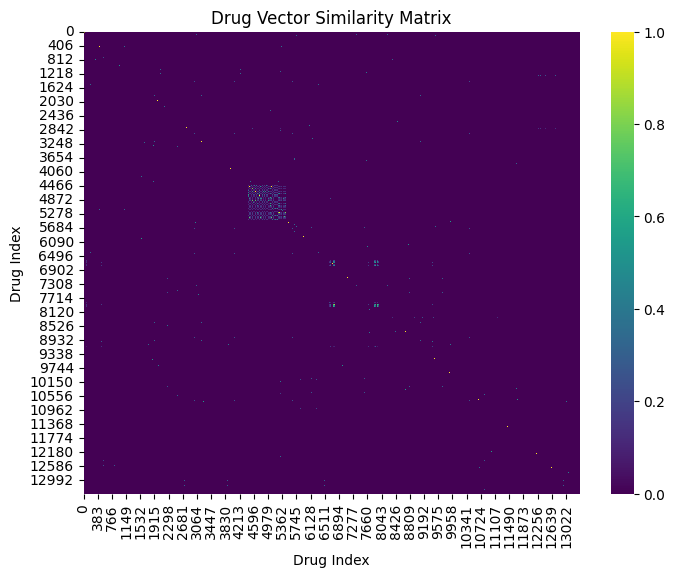

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load drug-target association data from CSV
csv_file_path = 'C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'
drug_target_df = pd.read_csv(csv_file_path)

# Assuming 'DRUGNAME' column contains the drug names or identifiers
corpus = drug_target_df['DRUGNAME'].tolist()

# Vectorize the corpus using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer()
drug_vectors = vectorizer.fit_transform(corpus)

# Calculate cosine similarity between drug vectors
similarity_matrix = cosine_similarity(drug_vectors, drug_vectors)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False)
plt.title('Drug Vector Similarity Matrix')
plt.xlabel('Drug Index')
plt.ylabel('Drug Index')
plt.show()


C:\Users\sides\AppData\Local\Temp\ipykernel_9816\3503094298.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)


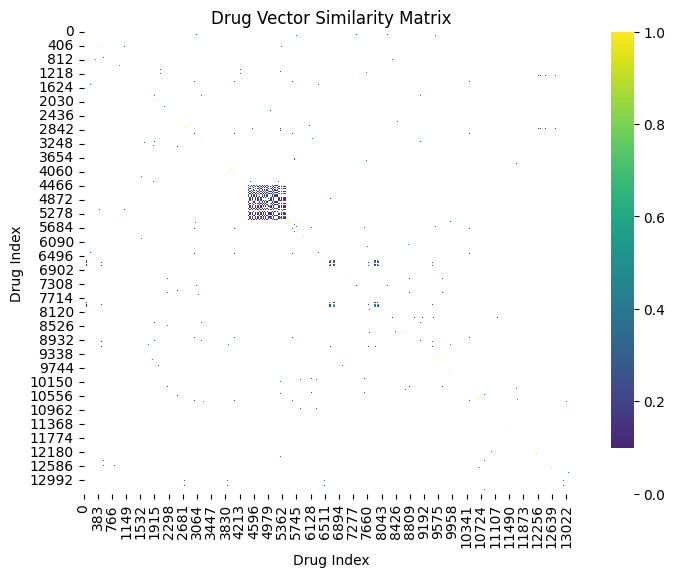

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load drug-target association data from CSV
csv_file_path = 'C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'  # Update this path to your file location
drug_target_df = pd.read_csv(csv_file_path)

# Assuming 'DRUGNAME' column contains the drug names or identifiers
corpus = drug_target_df['DRUGNAME'].tolist()

# Vectorize the corpus using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer()
drug_vectors = vectorizer.fit_transform(corpus)

# Calculate cosine similarity between drug vectors
similarity_matrix = cosine_similarity(drug_vectors, drug_vectors)

# Get the existing 'viridis' colormap
viridis = plt.cm.get_cmap('viridis', 256)

# Create a new colormap with white at the lowest value
newcolors = viridis(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
newcolors[:25, :] = white  # Replace 25 with more or fewer bins as needed for your data

# Create the new colormap from the new colors list
newcmp = LinearSegmentedColormap.from_list('WhiteViridis', newcolors)

# Plot the similarity matrix using the new colormap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap=newcmp, annot=False)
plt.title('Drug Vector Similarity Matrix')
plt.xlabel('Drug Index')
plt.ylabel('Drug Index')
plt.show()

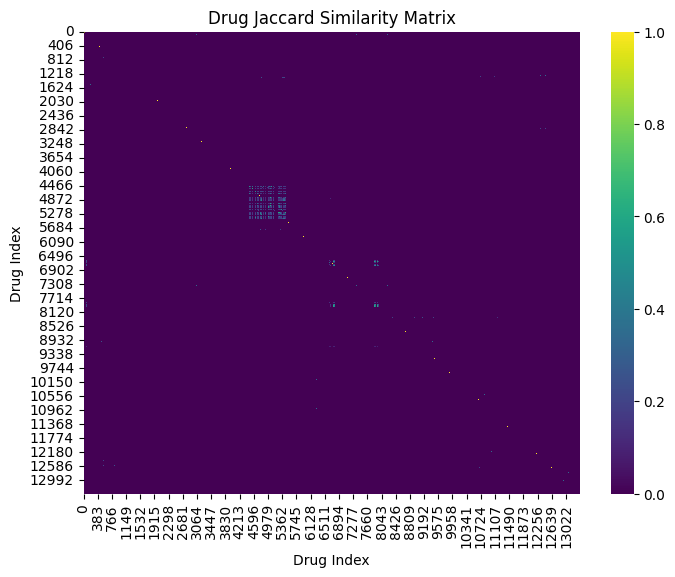

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load drug-target association data from CSV
csv_file_path = 'C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'
drug_target_df = pd.read_csv(csv_file_path)

# Assuming 'DRUGNAME' column contains the drug names or identifiers as strings
corpus = drug_target_df['DRUGNAME'].tolist()

# Tokenize drug names into sets of words
tokenized_corpus = [set(drug.split()) for drug in corpus]

# Calculate Jaccard index for drug similarity
jaccard_similarity_matrix = [] 
for i in range(len(tokenized_corpus)):
    jaccard_row = []
    set1 = tokenized_corpus[i]
    for j in range(len(tokenized_corpus)):
        set2 = tokenized_corpus[j]
        # Calculate Jaccard index
        jaccard = len(set1.intersection(set2)) / len(set1.union(set2)) if len(set1.union(set2)) > 0 else 0
        jaccard_row.append(jaccard)
    jaccard_similarity_matrix.append(jaccard_row)

# Convert list of lists to a numpy array for visualization
import numpy as np
jaccard_similarity_matrix = np.array(jaccard_similarity_matrix)

# Plot the Jaccard similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_similarity_matrix, cmap='viridis', annot=False)
plt.title('Drug Jaccard Similarity Matrix')
plt.xlabel('Drug Index')
plt.ylabel('Drug Index')
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr, spearmanr
from nltk.metrics import jaccard_distance, masi_distance, edit_distance

# Load drug-target association data from CSV
csv_file_path = 'C:/Users/sides/Downloads/DRUG_ID_TARGET.csv'
drug_target_df = pd.read_csv(csv_file_path)

# Assuming 'DRUGNAME' column contains the drug names or identifiers as strings
corpus = drug_target_df['DRUGNAME'].tolist()

# Vectorize the corpus using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(binary=True)
drug_vectors = vectorizer.fit_transform(corpus)

# Calculate Jaccard index for drug similarity
jaccard_similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        jaccard_similarity_matrix[i, j] = 1 - jaccard_distance(set(corpus[i]), set(corpus[j]))

# Calculate Masi distance for drug similarity (a modification of Jaccard for partial agreement)
masi_similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        masi_similarity_matrix[i, j] = 1 - masi_distance(set(corpus[i]), set(corpus[j]))

# Calculate Edit distance for drug similarity
edit_similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        edit_similarity_matrix[i, j] = 1 / (1 + edit_distance(corpus[i], corpus[j]))

# Calculate Cosine similarity for drug similarity
cosine_similarity_matrix = cosine_similarity(drug_vectors)

# Calculate Pearson correlation between similarity matrices
pearson_corr = np.corrcoef([jaccard_similarity_matrix.flatten(), masi_similarity_matrix.flatten(),
                            edit_similarity_matrix.flatten(), cosine_similarity_matrix.flatten()])[0, 1:]

# Calculate Spearman correlation between similarity matrices
spearman_corr = spearmanr(jaccard_similarity_matrix.flatten(), cosine_similarity_matrix.flatten())[0]

print("Jaccard Similarity Matrix:")
print(jaccard_similarity_matrix)
print("\nMasi Similarity Matrix:")
print(masi_similarity_matrix)
print("\nEdit Similarity Matrix:")
print(edit_similarity_matrix)
print("\nCosine Similarity Matrix:")
print(cosine_similarity_matrix)

print("\nPearson Correlation between Similarity Matrices:")
print(pearson_corr)
print("\nSpearman Correlation between Jaccard and Cosine Similarity Matrices:")
print(spearman_corr)


Jaccard Similarity Matrix:
[[1.         0.06666667 0.         ... 0.21428571 0.125      0.45454545]
 [0.06666667 1.         0.07142857 ... 0.         0.         0.06666667]
 [0.         0.07142857 1.         ... 0.         0.         0.        ]
 ...
 [0.21428571 0.         0.         ... 1.         0.35714286 0.41666667]
 [0.125      0.         0.         ... 0.35714286 1.         0.2       ]
 [0.45454545 0.06666667 0.         ... 0.41666667 0.2        1.        ]]

Masi Similarity Matrix:
[[1.         0.022      0.         ... 0.07071429 0.04125    0.15      ]
 [0.022      1.         0.02357143 ... 0.         0.         0.022     ]
 [0.         0.02357143 1.         ... 0.         0.         0.        ]
 ...
 [0.07071429 0.         0.         ... 1.         0.11785714 0.1375    ]
 [0.04125    0.         0.         ... 0.11785714 1.         0.066     ]
 [0.15       0.022      0.         ... 0.1375     0.066      1.        ]]

Edit Similarity Matrix:
[[1.         0.11111111 0.1        